# 시각화 기법

## x축 tick label 다루기

시계열 그래프는 x축 시간을 설정 > 변화하는 변수를 설정하는 차트
- 시계열 그래프의 x축 설정
- 데이터셋 : ABNB_stock.csv

In [18]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
df_abnb = pd.read_csv('./data/ABNB_stock.csv')
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


<Axes: xlabel='Date', ylabel='Close'>

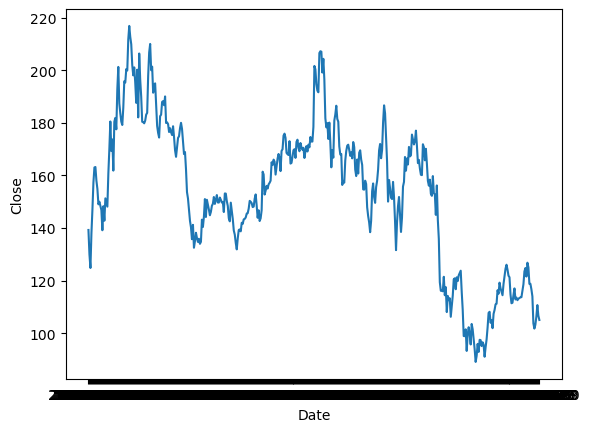

In [11]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)

In [12]:
# datetype으로 변환
df_abnb['Date'] = pd.to_datetime(df_abnb['Date'])
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       454 non-null    datetime64[ns]
 1   Open       454 non-null    float64       
 2   High       454 non-null    float64       
 3   Low        454 non-null    float64       
 4   Close      454 non-null    float64       
 5   Adj Close  454 non-null    float64       
 6   Volume     454 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 25.0 KB


<Axes: xlabel='Date', ylabel='Close'>

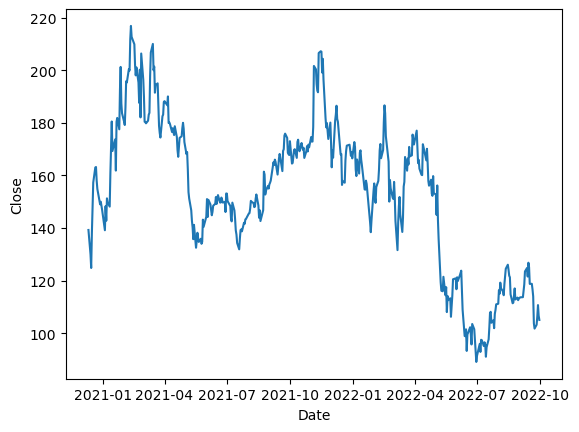

In [13]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)

object객체였던(=str타입) Date 컬럼을 단순히 datetime으로 변환만 했더니 시각호에서 Date의 인덱스 깨지지 않음

In [14]:
# 축 레벨을 회전, 표현 방식을 변경 > fomatter를 사용

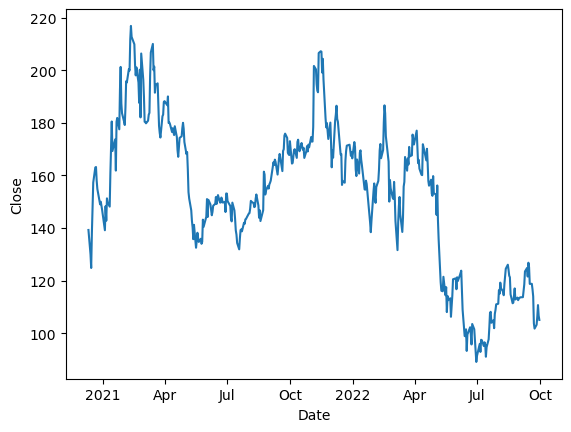

In [17]:
import matplotlib as mpl
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_formatter()))

In [20]:
# plotly line chart
px.line(data_frame=df_abnb, x='Date', y='Close', width=500, height=400)

In [21]:
fig = px.line(data_frame=df_abnb, x='Date', y='Close', width=500, height=400)
fig.update_xaxes(tickformat='%Y-%m-%d')

# 다중 축 차트

기본 차트 x,y + y1,y2 -> 하나의 ax에 그리기

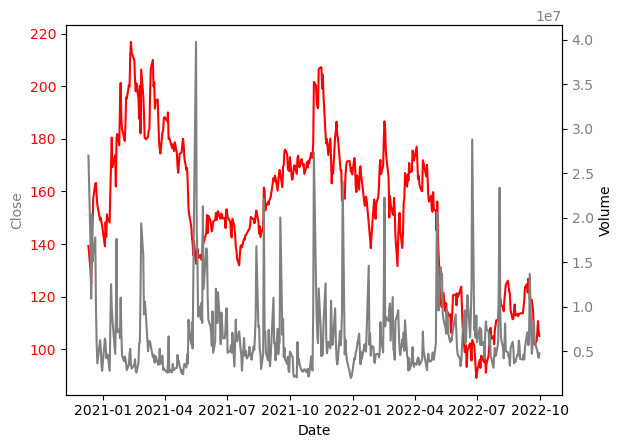

In [40]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax, color='red')
sns.lineplot(x='Date', y='Volume', data=df_abnb, ax=ax2, color='grey')

# 왼쪽이 y축 정보 설정
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')
# 오른쪽 y축
ax2.tick_params(axis='y', labelcolor='grey')
ax.yaxis.label.set_color('grey')

In [41]:
# 3개 축
# 최고가 - 최저가 = HIGH_LOW 변수 추가
df_abnb['High_Low'] = df_abnb['High']-df_abnb['Low']
df_abnb.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,High_Low
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,16.399994
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,10.139999
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,6.099998


<Axes: xlabel='Date', ylabel='High_Low'>

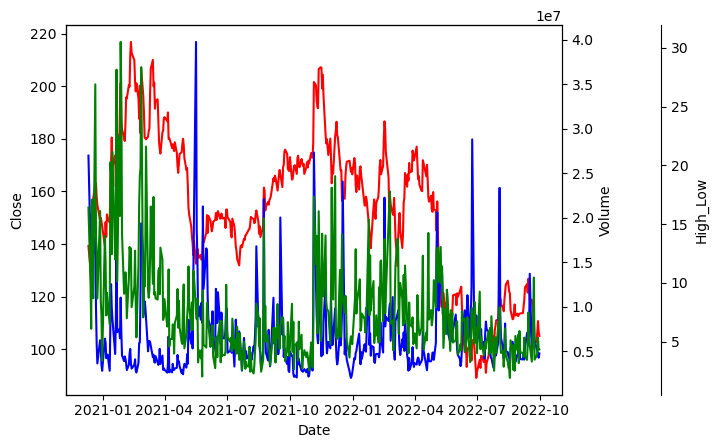

In [44]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()

ax3.spines.right.set_position(('axes',1.2)) #현재축 위치 1에서 0.2만큼 오른쪽으로 이동

sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax, color='red')
sns.lineplot(x='Date', y='Volume', data=df_abnb, ax=ax2, color='blue')
sns.lineplot(x='Date', y='High_Low', data=df_abnb, ax=ax3, color='green')

In [50]:
# plotly로 2중축 차트
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y":True}]]) # 2dimension list로 spec지정

#축설정
sub_fig_1 = px.line(df_abnb, x='Date', y='Close')
sub_fig_1.update_traces(line_color='red')
sub_fig_2 = px.line(df_abnb, x='Date', y='Volume')
sub_fig_2.update_traces(line_color='blue')
sub_fig_2.update_traces(yaxis='y2')

fig.add_traces(sub_fig_1.data + sub_fig_2.data)

#레이블설정
fig.layout.xaxis.title = 'Date'
fig.layout.yaxis.title = 'Close'
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.title = 'Volume'
fig.layout.yaxis2.color = 'blue'

fig.update_layout(width=500, height=400)

In [68]:
# plotly.graph_object
# 3개 축 그리기
import plotly.graph_objects as go
fig = make_subplots()
fig.add_trace(
    go.Scatter( # 1번째 축
    x=df_abnb['Date'], y=df_abnb['Close'], name='Close',
    mode='lines', yaxis='y', line={'color':'red'})
)
fig.add_trace(
    go.Scatter( # 2번째 축
    x=df_abnb['Date'], y=df_abnb['Volume'], name='Volume',
    mode='lines', yaxis='y2', line={'color':'blue'})
)
fig.add_trace(
    go.Scatter( # 3번째 축
    x=df_abnb['Date'], y=df_abnb['High_Low'], name='High_Low',
    mode='lines', yaxis='y3', line={'color':'purple'})
)

fig.update_layout(
    yaxis=dict(title='Close'),
    yaxis2=dict(title='Volume', position=1, side='right', overlaying='y', anchor='free'),
    yaxis3=dict(title='High_Low', side='right', anchor='x', overlaying='y'),
    xaxis=dict(title='Date', domain=[.1, .85]),
    width=600, height=400
)
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'purple'

fig.show()  

In [70]:
# 범례 위치 조정하기

In [72]:
df_co2 = pd.read_csv(
    './data/CO2_Emissions.csv'
)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

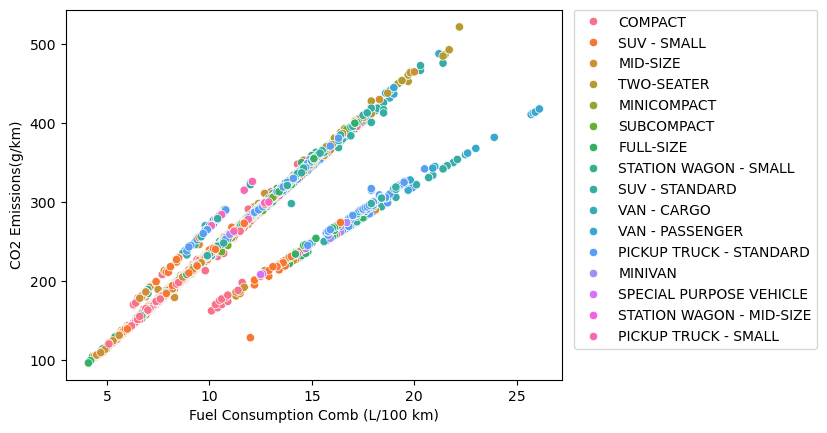

In [78]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    data=df_co2, hue='Vehicle Class',
    ax=ax
)
ax.legend(bbox_to_anchor=(1.01,1.02)) # 왼쪽 하단 0.0, 오른쪽 상단

In [86]:
fig= px.scatter(
    df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    color='Vehicle Class'
)
# plotly scatter
fig.update_layout(legend_x=1.0, legend_y=1.0)
fig.show()

# 강조하기
테두리 색, 굵기 조정

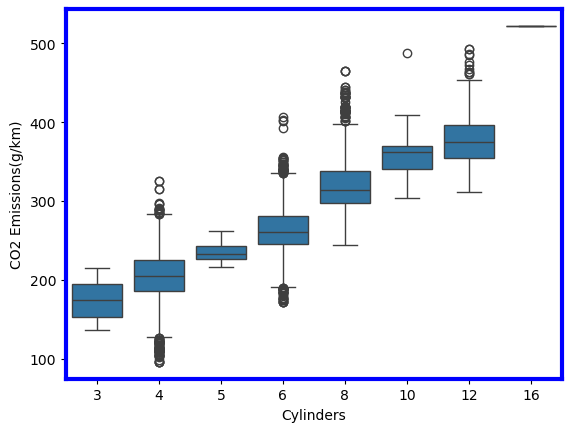

In [91]:
fig, ax = plt.subplots()

sns.boxplot(
    x='Cylinders', y='CO2 Emissions(g/km)',
    data=df_co2, ax=ax
)
spines = ['left', 'right', 'top', 'bottom']
for spin in spines:
    ax.spines[spin].set_color('blue')
    ax.spines[spin].set_linewidth(3)

In [96]:
# plotly 테두리 강조하기
fig = px.box(
    df_co2,
    x='Cylinders',
    y='CO2 Emissions(g/km)'
)
fig.update_xaxes(showline= True, linecolor='red', linewidth=3, mirror=True)
fig.update_yaxes(showline= True, linecolor='red', linewidth=3, mirror=True) #매개변수로 설정
fig.show()

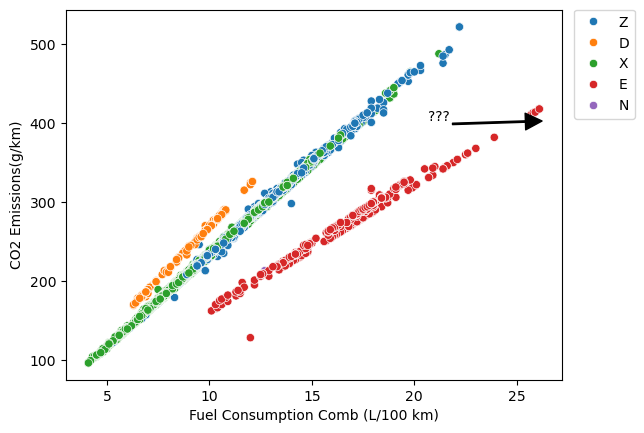

In [110]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    data=df_co2, hue='Fuel Type',
    ax=ax
)
ax.annotate(
    xy=(0.96,0.7),
    text='???',
    xytext=(0.73,0.7), 
    arrowprops={'color':'black', 'width':1},
    xycoords=ax.transAxes
)
ax.legend(bbox_to_anchor=(1.01,1.02))

In [112]:
# plotly scatter
fig= px.scatter(
    df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    color='Fuel Type', width=800, height=600
)
fig.update_layout(legend_x=1.0, legend_y=1.0)

fig.add_annotation(
    x=0.9, y=0.75,
    text='<b>feul type ethanol emits less CO2</b>',
    yref='y domain', xref='x domain',
    showarrow=True, arrowhead=2
)

In [4]:
# 조건을 이용한 강조하기

In [114]:
df_ins = pd.read_csv(
    './data/product_inspection.csv'
)
df_ins['date'] = pd.to_datetime(df_ins['date'])
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             429 non-null    datetime64[ns]
 1   inspection_step  429 non-null    object        
 2   value            429 non-null    float64       
 3   upper_spec       429 non-null    float64       
 4   target           429 non-null    float64       
 5   lower_spec       429 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 20.2+ KB


In [115]:
df_ins.head(5)

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6


In [117]:
df_ins_A = df_ins.query("inspection_step=='A'")
df_ins_A

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6
...,...,...,...,...,...,...
138,2022-05-19,A,21.7,22.0,21.3,20.6
139,2022-05-20,A,21.6,22.0,21.3,20.6
140,2022-05-21,A,21.6,22.0,21.3,20.6
141,2022-05-22,A,21.4,22.0,21.3,20.6


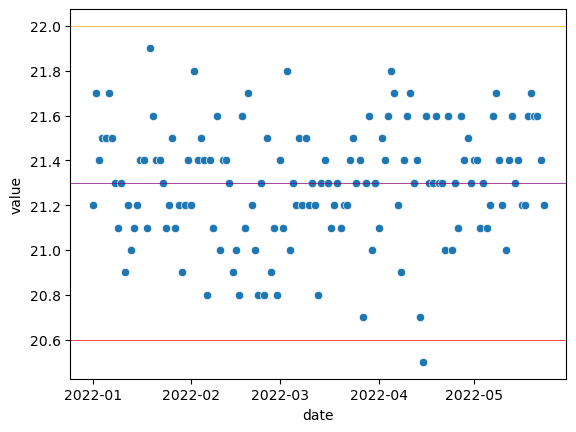

In [122]:
fig, ax = plt.subplots()
sns.scatterplot(x='date', y='value', data=df_ins_A, ax=ax)
# 수평선 그리기
ax.axhline(df_ins_A['lower_spec'].iloc[-1], color='red', linewidth=0.5)
ax.axhline(df_ins_A['target'].iloc[-1], color='purple', linewidth=0.5)
ax.axhline(df_ins_A['upper_spec'].iloc[-1], color='orange', linewidth=0.5)

In [128]:
# plotly
fig = px.scatter(df_ins_A, x='date', y='value', width=500, height=400)
fig.add_hline(y=df_ins_A['lower_spec'].iloc[-1], line_color='red', line_width=0.5)
fig.add_hline(y=df_ins_A['target'].iloc[-1], line_color='purple', line_width=0.5)
fig.add_hline(y=df_ins_A['upper_spec'].iloc[-1], line_color='orange', line_width=0.5)
fig.show()

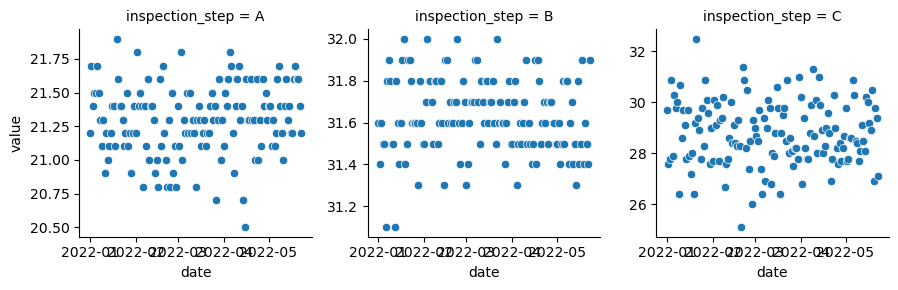

In [134]:
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step')
g.map_dataframe(sns.scatterplot, x='date', y='value')

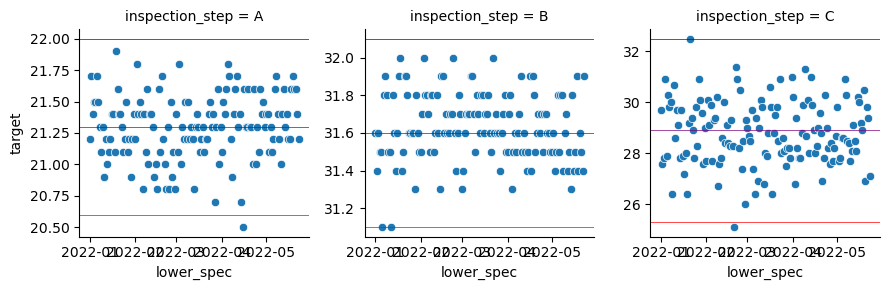

In [135]:
def custom(lower_spec, target, upper_spec, **kws):
    ax = plt.gca()
    # 수평선 그리기
    ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(target.iloc[-1], color='purple', linewidth=0.5)
    ax.axhline(upper_spec.iloc[-1], color='blue', linewidth=0.5)
    
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step')
g.map_dataframe(sns.scatterplot, x='date', y='value')
g.map(custom, 'lower_spec', 'target', 'upper_spec')

In [137]:
# plotly에서의 홀용
fig = px.scatter(df_ins, x='date', y='value', facet_col='inspection_step')
print(fig.layout.annotations)

# For 문을 이용한 plotly에서의 facet mapping
fig = px.scatter(df_ins, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df_ins['inspection_step'].nunique()):
    step = fig.layout.annotations[idx].text.split('=')[1]
    fig.add_hline(
        y=df_ins.query('inspection_step == @step')['lower_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df_ins.query('inspection_step == @step')['upper_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df_ins.query('inspection_step == @step')['target'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )

fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

(layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=A',
    'x': 0.15999999999999998,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=B',
    'x': 0.49999999999999994,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=C',
    'x': 0.8399999999999999,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}))


In [138]:
# 특정 조건에 해당하는 값 찾기 
# 각 공정별로 관리스펙에서 벗어난 자재가 있는 그래프 테두리 강조
df_ins['spec_out'] = (df_ins['value'] > df_ins['upper_spec']) | (df_ins['value'] < df_ins['lower_spec'])
df_ins.head(5)

,date,inspection_step,value,upper_spec,target,lower_spec,spec_out
0,2022-01-01,A,21.2,22.0,21.3,20.6,False
1,2022-01-02,A,21.7,22.0,21.3,20.6,False
2,2022-01-03,A,21.4,22.0,21.3,20.6,False
3,2022-01-04,A,21.5,22.0,21.3,20.6,False
4,2022-01-05,A,21.5,22.0,21.3,20.6,False


Text(0.5, 0.9, '???')

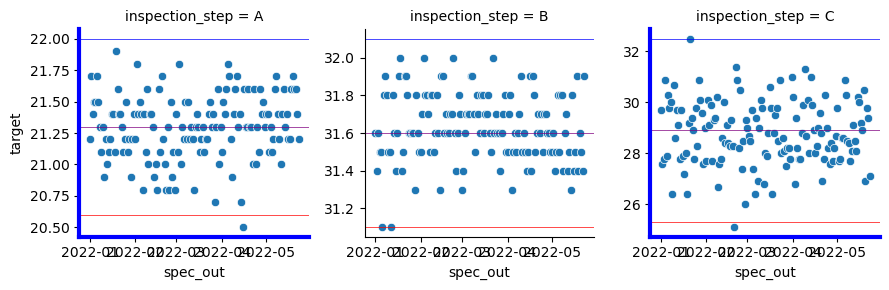

In [150]:
def custom(lower_spec, target, upper_spec, **kws):
    ax = plt.gca()
    # 수평선 그리기
    ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(target.iloc[-1], color='purple', linewidth=0.5)
    ax.axhline(upper_spec.iloc[-1], color='blue', linewidth=0.5)

def if_spec_out(spec_out, **kws):
    if spec_out.sum() > 0:
        ax=plt.gca()
        spines = ['left', 'bottom']
        for spine in spines:
            ax.spines[spine].set_color('blue')
            ax.spines[spine].set_linewidth(3)
            
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step')
g.map_dataframe(sns.scatterplot, x='date', y='value')
g.map(custom, 'lower_spec', 'target', 'upper_spec')
g.map(if_spec_out, 'spec_out')

ax.annotate(
    xy=(0.5,0.9),
    text='???',
    xytext=(0.5,0.9), 
    arrowprops={'color':'black', 'width':1},
    textcoords='axes fraction'
)

In [152]:
# 기하급수적으로 커지는 y축값을 변환해서 표현
df_covid = pd.read_csv('./data/Covid19-India.csv') 
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28568 entries, 0 to 28567
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       28568 non-null  datetime64[ns]
 1   region     28568 non-null  object        
 2   confirmed  28568 non-null  int64         
 3   active     28568 non-null  int64         
 4   cured      28568 non-null  int64         
 5   deaths     28568 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.3+ MB


<Axes: xlabel='date', ylabel='confirmed'>

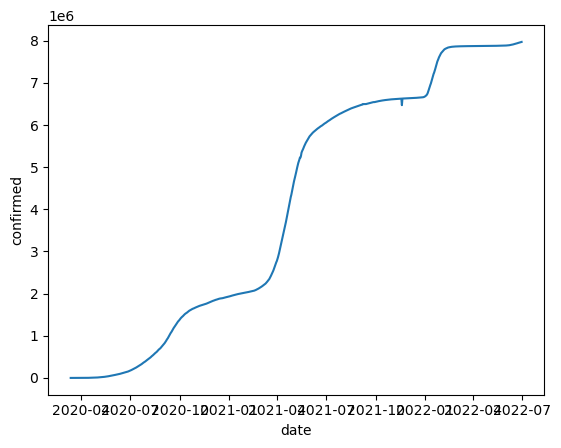

In [158]:
fig, ax = plt.subplots()
sns.lineplot(data=df_covid_Mah, x='date', y='confirmed', ax=ax)

In [157]:
df_covid_Mah = df_covid.loc[df_covid.region =='Maharashtra']
df_covid_Mah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 15857 to 16666
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       810 non-null    datetime64[ns]
 1   region     810 non-null    object        
 2   confirmed  810 non-null    int64         
 3   active     810 non-null    int64         
 4   cured      810 non-null    int64         
 5   deaths     810 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 44.3+ KB


y 값을 로그 스케일 10의 1승, 2승, 3승...
로그 형식으로 변환해서 그립니다

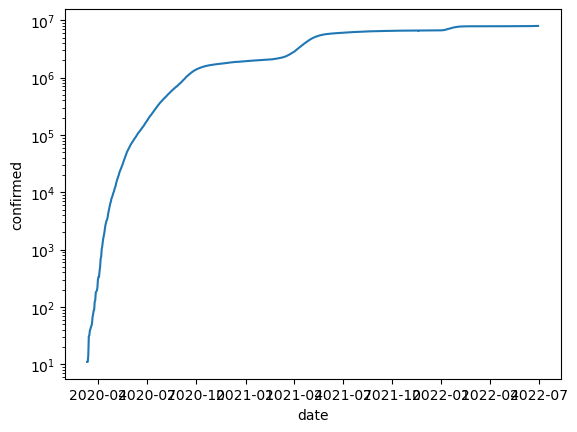

In [160]:
fig, ax = plt.subplots()
sns.lineplot(data=df_covid_Mah, x='date', y='confirmed', ax=ax)
ax.set_yscale('log')

In [162]:
# plotly에서 로그스케일
fig = px.line(
    df_covid_Mah, x='date', y='confirmed', width=500, height=400, log_y=True)

fig.show()

In [ ]:
# seaborn color palette, plotly color

# 색상 선택하기

<Axes: xlabel='total_bill', ylabel='tip'>

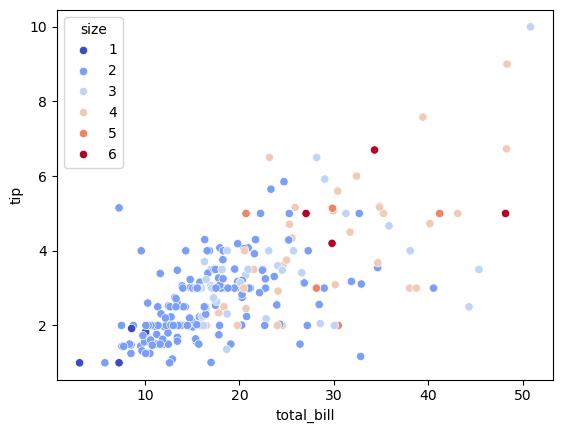

In [170]:
df_tips = sns.load_dataset('tips')

color = sns.color_palette('coolwarm', as_cmap=True)
fig, ax =plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df_tips, ax=ax, hue='size', palette=color)

# plotly 색상 팔레트
- 범주형 : px.colors.qualitative
- 연속형 : px.colors.sequential
- 양극형 : px.colors.diverging
- 주기적 데이터 : px.colors.cyclical

In [171]:
fig = px.colors.qualitative.swatches()
fig

In [175]:
# 연속형 변수에 적용하는 컬럼맵
fig = px.colors.sequential.swatches_continuous()
fig.show()

In [174]:
px.scatter(
    df_tips, x='total_bill', y='tip', width=500, height=400,
    color='size', color_continuous_scale='Viridis'
    
)

In [ ]:
# 범주형 변수를 이용한 색상 표현하기
fig = px.scatter(
    df_tips, x='total_bill', y='tip', width=500, height=400,
    color='total_bill', color_continuous_scale='Agsunset' 
)
fig.show()
